In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
df = pd.read_csv('results/wind_tunnel_data_50K_calc_40K.csv')
# df = pd.read_csv('results/wind_tunnel_data_100K_calc_80K.csv')

In [28]:
# combine angles and calculate means but keep angle as column
df = df.groupby('Angle').mean().reset_index()
df['Abs_Error_Lift'] = abs(df['Lift_Data'] - df['Lift_Calculated'])
df['Abs_Error_Drag'] = abs(df['Drag_Data'] - df['Drag_Calculated'])
df['Rel_Error_Lift'] = abs(df['Abs_Error_Lift'] / df['Lift_Data'])
df['Rel_Error_Drag'] = abs(df['Abs_Error_Drag'] / df['Drag_Data'])

In [29]:
df_clean = df[df['Rel_Error_Lift'] < 5]
df_clean = df_clean[df_clean['Rel_Error_Drag'] < 5]

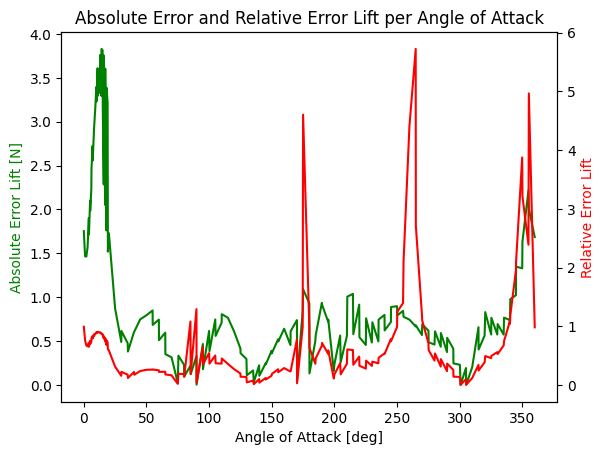

In [30]:
# error lift per angle of attack
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Angle'], df['Abs_Error_Lift'], 'g-')
ax2.plot(df['Angle'], df['Rel_Error_Lift'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Lift [N]', color='g')
ax2.set_ylabel('Relative Error Lift', color='r')
plt.title('Absolute Error and Relative Error Lift per Angle of Attack')
plt.show()

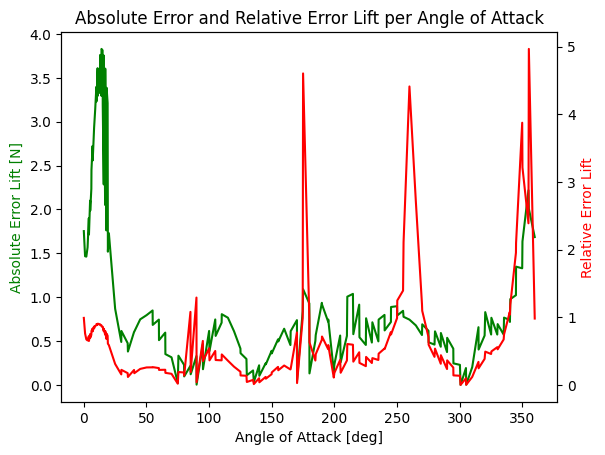

In [31]:
# error lift per angle of attack
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_clean['Angle'], df_clean['Abs_Error_Lift'], 'g-')
ax2.plot(df_clean['Angle'], df_clean['Rel_Error_Lift'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Lift [N]', color='g')
ax2.set_ylabel('Relative Error Lift', color='r')
plt.title('Absolute Error and Relative Error Lift per Angle of Attack')
plt.show()

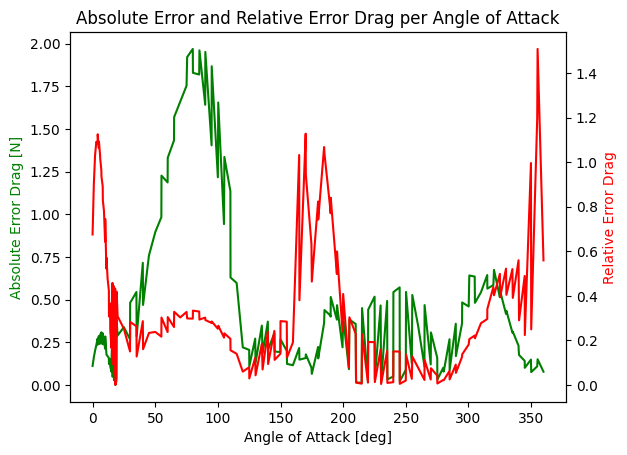

In [32]:
# absolute error drag per angle of attack
df_error_drag = pd.DataFrame()
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Angle'], df['Abs_Error_Drag'], 'g-')
ax2.plot(df['Angle'], df['Rel_Error_Drag'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Drag [N]', color='g')
ax2.set_ylabel('Relative Error Drag', color='r')
plt.title('Absolute Error and Relative Error Drag per Angle of Attack')

plt.show()

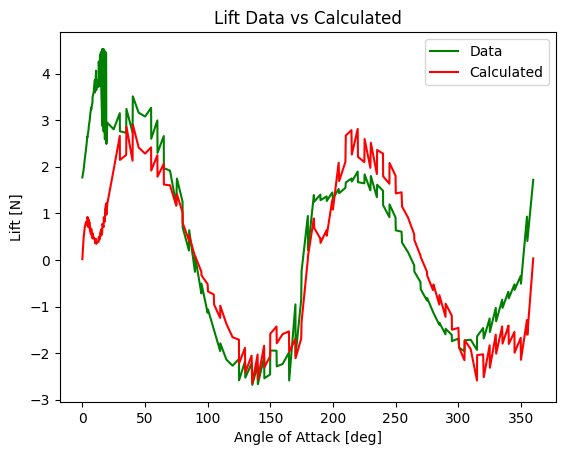

In [33]:
# plot calc lift vs data lift for all angles 
# put angle on x-axis and lift on y-axis
plt.plot(df['Angle'], df['Lift_Data'], 'g-', label='Data')
plt.plot(df['Angle'], df['Lift_Calculated'], 'r-', label='Calculated')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Lift [N]')
plt.legend()
plt.title('Lift Data vs Calculated')


plt.show()

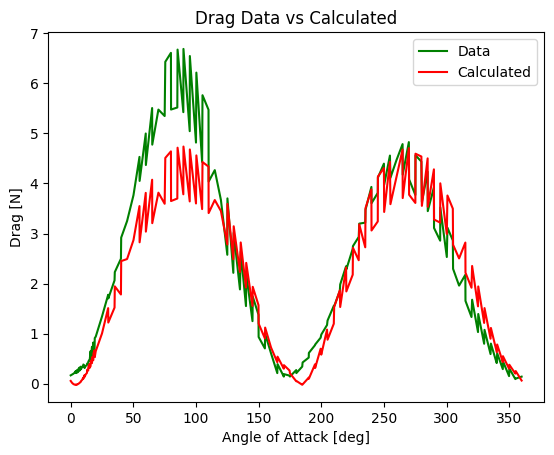

In [34]:
# plot calc drag vs data drag for all angles
# put angle on x-axis and drag on y-axis
plt.plot(df['Angle'], df['Drag_Data'], 'g-', label='Data')
plt.plot(df['Angle'], df['Drag_Calculated'], 'r-', label='Calculated')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Drag [N]')
plt.legend()
plt.title('Drag Data vs Calculated')
plt.show()


In [35]:
# print outliers
print(df[df['Rel_Error_Lift'] > 10])

Empty DataFrame
Columns: [Angle, Wind_Speed, Lift_Calculated, Drag_Calculated, Lift_Data, Drag_Data, Abs_Error_Lift, Abs_Error_Drag, Rel_Error_Lift, Rel_Error_Drag]
Index: []


In [36]:
outlier = df.iloc[152]
print(outlier)
print("Angle: ", outlier['Angle'])
print("Lift Data: ", outlier['Lift_Data'])
print("Lift Calculated: ", outlier['Lift_Calculated'])
print("Abs Error Lift: ", abs(outlier['Lift_Data'] - outlier['Lift_Calculated']))
print("Rel Error Lift: ", abs(abs(outlier['Lift_Data'] - outlier['Lift_Calculated']) / outlier['Lift_Data']))

Angle              335.400000
Wind_Speed          15.950000
Lift_Calculated     -1.795687
Drag_Calculated      1.111973
Lift_Data           -1.028500
Drag_Data            0.799500
Abs_Error_Lift       0.767187
Abs_Error_Drag       0.312473
Rel_Error_Lift       0.745928
Rel_Error_Drag       0.390835
Name: 152, dtype: float64
Angle:  335.4
Lift Data:  -1.0285
Lift Calculated:  -1.7956867247875814
Abs Error Lift:  0.7671867247875814
Rel Error Lift:  0.7459277829728551
